In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from keras.models import Sequential, load_model
from keras.layers import LSTM, GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from matplotlib.pyplot import figure #bigger figure


In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  #disable tensorflow warnings

In [3]:
def read_from_source():
    df = pd.read_csv('https://toyokeizai.net/sp/visual/tko/covid19/csv/pcr_positive_daily.csv')
    df = df.rename(columns={'日付': 'Date', 'PCR 検査陽性者数(単日)': 'Infected'}) #renaming from Japanese to English
    df['Date'] = pd.to_datetime(df['Date'])
    return df


In [4]:
df_all = pd.read_csv('avg_infected_obs_all_pred_Nov20.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
print(df_all.shape)
print(df_all.info())
df_all

(660, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            660 non-null    datetime64[ns]
 1   Observed_cases  660 non-null    int64         
 2   Pred_GRU_1      660 non-null    int64         
 3   Pred_GRU_2      660 non-null    int64         
 4   Pred_GRU_3      660 non-null    int64         
 5   Pred_mean_GRU   660 non-null    int64         
 6   Pred_LSTM_1     660 non-null    int64         
 7   Pred_LSTM_2     660 non-null    int64         
 8   Pred_LSTM_3     660 non-null    int64         
 9   Pred_mean_LSTM  660 non-null    int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 51.7 KB
None


,Date,Observed_cases,Pred_GRU_1,Pred_GRU_2,Pred_GRU_3,Pred_mean_GRU,Pred_LSTM_1,Pred_LSTM_2,Pred_LSTM_3,Pred_mean_LSTM
0,2020-01-31,0,0,0,0,0,0,1,1,1
1,2020-02-01,0,5,5,2,4,3,2,3,3
2,2020-02-02,0,0,0,0,0,0,1,0,0
3,2020-02-03,0,1,3,2,2,0,1,1,1
4,2020-02-04,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
655,2021-11-16,147,156,135,151,147,158,153,131,147
656,2021-11-17,199,189,170,158,172,153,160,108,140
657,2021-11-18,159,125,172,183,160,162,149,90,134
658,2021-11-19,153,243,234,233,237,166,136,102,135


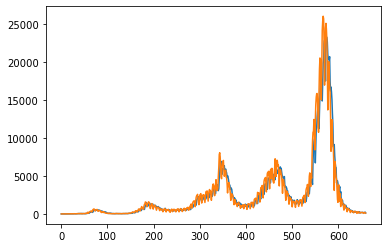

In [6]:
plt.plot(df_all['Pred_mean_GRU'])
plt.plot(df_all['Observed_cases'])